# Sakib Hossain (123379133) - Second CA Training

In [1]:
import os
from google.colab import drive
drive.mount('/content/drive')
base_dir = "./drive/My Drive/"
train_dir = os.path.join(base_dir, "train")
val_dir = os.path.join(base_dir, "val")
test_dir = os.path.join(base_dir, "test")

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from keras import Model
from keras import Input
from keras import regularizers
from keras.layers import Dense
from keras.layers import Rescaling
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import BatchNormalization
from keras.layers import Dropout, RandomFlip, RandomRotation, RandomZoom, RandomContrast
from keras.layers import GlobalAveragePooling2D

from keras.optimizers import RMSprop

from keras.callbacks import EarlyStopping
from keras.callbacks import ReduceLROnPlateau

from keras.datasets import mnist

from keras.applications import ResNet50
import keras.applications.resnet as resnet

from keras.preprocessing.image import load_img
from keras.preprocessing import image_dataset_from_directory

In [3]:
! pip install keras_tuner

import keras_tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 kB 5.6 MB/s eta 0:00:00


In [4]:
def plot_keras_history(history, metric):
    fig, axes = plt.subplots(1, 2, figsize=(6, 3))
    fig.tight_layout()
    axes[0].plot(history.history["loss"], label="train loss")
    axes[0].plot(history.history["val_loss"], label="val loss")
    axes[0].set_title("Loss")
    axes[0].legend()
    axes[1].plot(history.history[metric], label="train " + metric)
    axes[1].plot(history.history["val_" + metric], label="val " + metric)
    axes[1].set_title(metric)
    axes[1].legend()
    plt.show()

# Sheep and Goats
On the ImageNet website, there are plenty of animal examples, so I've decided to take two familiar animals that weren't present on the list to complete my assignment on.

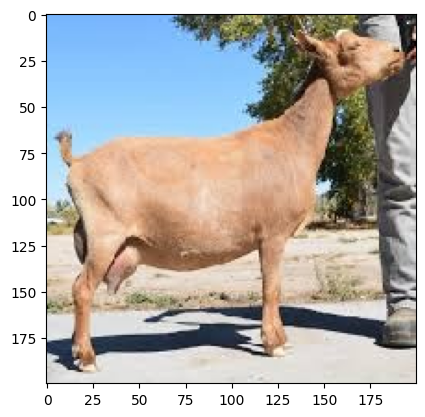

In [5]:
# Let's look at one of the goat images

train_goats_dir = os.path.join(train_dir, "goats")
filenames = [os.path.join(train_goats_dir, filename) for filename in os.listdir(train_goats_dir)]

idx = 100 # Change this if you want to look at a different goat
some_example = load_img(filenames[idx], target_size=(200,200))

plt.imshow(some_example)
plt.show()

In [6]:
train_dataset = image_dataset_from_directory(directory=train_dir, label_mode="binary", image_size=(224, 224))
val_dataset = image_dataset_from_directory(directory=val_dir, label_mode="binary", image_size=(224, 224))
test_dataset = image_dataset_from_directory(directory=test_dir, label_mode="binary", image_size=(224, 224))

Found 240 files belonging to 2 classes.
Found 180 files belonging to 2 classes.
Found 180 files belonging to 2 classes.


# A 2D ConvNet Model
I am testing the 2d Convolutional Neural Network model from the lecture slides as, according to Google (no particular website just the AI overview when a search is made), "its architecture is specifically designed to exploit the spatial hierarchy and local structure inherent in visual data". Since this version 1 is a rehash of lecture code I've commented it out.

In [7]:
# inputs = Input(shape=(224, 224, 3))
# x = Rescaling(scale=1./255)(inputs)
# x = Conv2D(filters=32, kernel_size=(3, 3), activation="relu")(x)
# x = MaxPooling2D(pool_size=(2, 2))(x)
# x = Conv2D(filters=64, kernel_size=(3, 3), activation="relu")(x)
# x = MaxPooling2D(pool_size=(2, 2))(x)
# x = Conv2D(filters=64, kernel_size=(3, 3), activation="relu")(x)
# x = Flatten()(x)
# x = Dense(units=64, activation="relu")(x)
# outputs = Dense(units=1, activation="sigmoid")(x)
# convnetv1 = Model(inputs, outputs)

In [8]:
#convnetv1.compile(optimizer=RMSprop(learning_rate=0.0001), loss="binary_crossentropy", metrics=["accuracy"])

In [9]:
# convnet_model_history_v1 = convnetv1.fit(train_dataset, epochs=20,
#             verbose=0, validation_data=val_dataset,
#             callbacks=[EarlyStopping(monitor="val_loss", patience=4, restore_best_weights=True)])

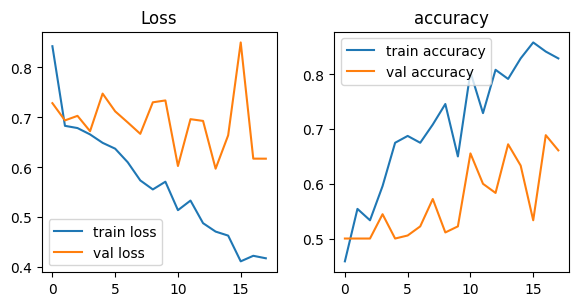

In [39]:
#plot_keras_history(convnet_model_history_v1, "accuracy")

The graph above isn't too positive as we're only getting an ~70-80% training accuracy and a highly fluctuating ~55-65% validation accuracy. Not only is work needed to fix the overfitting, but the model itself will need adjustments to make it more acceptable.

In [40]:
#convnetv1.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 173056)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │    11,075,648 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,264,068 (84.93 MB)

 Trainable params: 11,132,033 (42.47 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 11,132,035 (42.47 MB)

# 2D ConvNet Model Version 2

In this version Batch Normalization is added in each layer to "normalize the activations of each layer in a CNN, which helps stabilize and accelerate the training process by reducing internal covariate shift" (Google quote again). Data augmentation and dropout features were also added in an attempt to reduce overfitting. There are two versions here, one with data augmentation and one without. Do not run both models (for timing reasons), only try one.

A version with data augmentation and dropout.

In [10]:
inputs = Input(shape=(224, 224, 3))
x = Rescaling(scale=1./255)(inputs)

# Data augmentation
x = RandomRotation(0.1)(x)
x = RandomZoom(0.1)(x)

x = Conv2D(filters=16, kernel_size=(3, 3), activation="relu")(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)

x = Conv2D(filters=32, kernel_size=(3, 3), activation="relu")(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)

x = Conv2D(filters=32, kernel_size=(3, 3), activation="relu")(x)
x = BatchNormalization()(x)
x = Dropout(0.25)(x)

x = Flatten()(x)
x = Dense(units=32, activation="relu")(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

outputs = Dense(units=1, activation="sigmoid")(x)
convnetv2 = Model(inputs, outputs)

A version without data augmentation and just dropout.

In [11]:
inputs = Input(shape=(224, 224, 3))
x = Rescaling(scale=1./255)(inputs)

x = Conv2D(filters=16, kernel_size=(3, 3), activation="relu")(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)

x = Conv2D(filters=32, kernel_size=(3, 3), activation="relu")(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)

x = Conv2D(filters=32, kernel_size=(3, 3), activation="relu")(x)
x = BatchNormalization()(x)
x = Dropout(0.25)(x)

x = Flatten()(x)
x = Dense(units=32, activation="relu")(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

outputs = Dense(units=1, activation="sigmoid")(x)
convnetv2 = Model(inputs, outputs)

Changes were also made to the compiler in an attempt at getting a better score. The learning rate was changed to 0.001, as this is a more balanced starting point for the task. The 'EarlyStopping' callback was also made to be more patient and a new callback was added 'ReduceLROnPlateau', which reduces the learning rate of a neural network model when a monitored metric stops improving. This makes it more efficient than starting with a lower learning rate, while automatically adjusting for fine tuning.

In [12]:
convnetv2.compile(
    optimizer=RMSprop(learning_rate=0.001),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

callbacks = [
    EarlyStopping(
        monitor="val_loss",
        patience=7,
        restore_best_weights=True,
        verbose=1
    ),
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,  # Reduce LR by half when plateauing
        patience=3,
        min_lr=1e-7,
        verbose=1
    )
]

Small change here changing verbose to 1 so I can see the progress per epoch.

In [13]:
convnet_model_history_v2 = convnetv2.fit(
    train_dataset,
    epochs=20,
    verbose=1,
    validation_data=val_dataset,
    callbacks=callbacks
)

Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.5941 - loss: 1.0539 - val_accuracy: 0.5222 - val_loss: 0.7107 - learning_rate: 0.0010
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 221ms/step - accuracy: 0.7512 - loss: 0.5423 - val_accuracy: 0.5000 - val_loss: 0.8202 - learning_rate: 0.0010
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 229ms/step - accuracy: 0.8451 - loss: 0.3662 - val_accuracy: 0.5000 - val_loss: 0.7644 - learning_rate: 0.0010
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 209ms/step - accuracy: 0.9218 - loss: 0.2517 - val_accuracy: 0.5944 - val_loss: 0.6724 - learning_rate: 0.0010
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 214ms/step - accuracy: 0.8446 - loss: 0.3488 - val_accuracy: 0.5000 - val_loss: 0.9600 - learning_rate: 0.0010
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 326ms/step - accuracy: 0.9474 - loss: 0.1715 - val_accuracy: 0.5000 - val_loss: 0.8434 - learning_rate: 0.0010
Epoch 7/20
7/8 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - accuracy: 0.9768 - loss: 0.1207
Epoch 7: ReduceLRO

In [14]:
convnetv2.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_2 (Rescaling)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 222, 222, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 222, 222, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 111, 111, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 111, 111, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 109, 109, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 109, 109, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 52, 52, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 52, 52, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 52, 52, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │     2,768,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,567,268 (21.24 MB)

 Trainable params: 2,783,521 (10.62 MB)

 Non-trainable params: 224 (896.00 B)

 Optimizer params: 2,783,523 (10.62 MB)

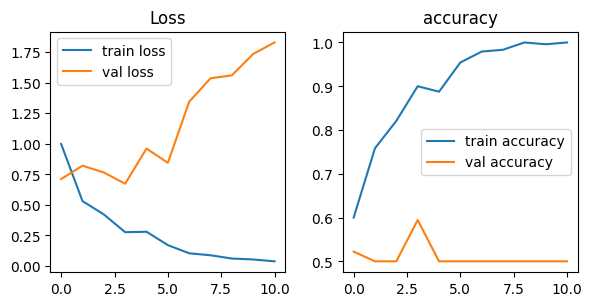

In [15]:
plot_keras_history(convnet_model_history_v2, "accuracy")

Regardless of the overfitting functions I add, the model is suffering from severe overfitting and high validation losses. The model with data augmentation also brings down the training accuracy significantly aswell. It is clear either way that neither of them can be considered a suitable candidate for best network.

# 2D ConvNet Version 3

The main issue I have for the version 2 model without data augmentation which reaches a training accuracy of 100% is that it seems to be memorizing rather than generalizing. This seems to be the reason as to why the validation loss is so high and accuracy so low. In this version I'm going to be making changes to the number of layers and filters to try and get a more respectable result.

Removing two internal layers from the model below. This is due to my belief that the model is currently too dense, allowing it to memorize the training images than train from it. After testing, this model shows no performance benefits and so has been commented out as it is also slower.

In [16]:
# inputs = Input(shape=(224, 224, 3))
# x = Rescaling(scale=1./255)(inputs)

# x = Conv2D(filters=16, kernel_size=(3, 3), activation="relu")(x)
# x = BatchNormalization()(x)
# x = MaxPooling2D(pool_size=(2, 2))(x)
# x = Dropout(0.25)(x)

# x = Flatten()(x)
# x = Dense(units=32, activation="relu")(x)
# x = BatchNormalization()(x)
# x = Dropout(0.5)(x)

# outputs = Dense(units=1, activation="sigmoid")(x)
# convnetv3 = Model(inputs, outputs)

This time I tried the opposite, increased number of layers and filters per layer in an attempt at getting better feature extraction. I removed dropout (excluding the final layer) too as it had no impact on the overfitting problem. I also added 'GlobalAveragePooling2D' instead of 'Flatten' as it reduces the number of parameters entering the Dense layer significantly, which should help with memorization problem.

In [17]:
inputs = Input(shape=(224, 224, 3))
x = Rescaling(1./255)(inputs)

x = Conv2D(32, (3,3),  activation="relu")(x)
x = Conv2D(32, (3,3),  activation="relu")(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Conv2D(64, (3,3),  activation="relu")(x)
x = Conv2D(64, (3,3),  activation="relu")(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Conv2D(128, (3,3),  activation="relu")(x)
x = Conv2D(128, (3,3),  activation="relu")(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = GlobalAveragePooling2D()(x)
x = Dense(64, activation="relu")(x)
x = Dropout(0.5)(x)

outputs = Dense(1, activation="sigmoid")(x)

convnetv3 = Model(inputs, outputs)

Some comments on the result of this model. It reduces the training accuracy from 100% and each epoch shows improvements in the training accuracy which is a positive. Again, the main issue is the validation accuracy and the heavy overfitting. No matter whether I use data augmentation, dropout, weight regularization or batch normalization, this 2d convnet model doesnt seem to want to budge.

For the following model I did look at ChatGPT for inspiration, where it suggested me to introduce data augmentation again and to introduce kernel regularization, which prevents weights from becoming too large. It has reduced the number of layers from the above model and brought back dropout to try combat overfitting. Padding was also added, which apparently controls how the edges of an image are handled during convolution.

In [20]:
inputs = Input(shape=(224, 224, 3))

augmented = RandomFlip("horizontal")(inputs)
augmented = RandomRotation(0.15)(augmented)
augmented = RandomZoom(0.2)(augmented)
augmented = RandomContrast(0.2)(augmented)

x = Rescaling(1./255)(augmented)

x = Conv2D(
    32, (3,3), padding="same", activation="relu",
    kernel_regularizer=regularizers.l2(0.001)
)(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)
x = Dropout(0.25)(x)


x = Conv2D(
    64, (3,3), padding="same", activation="relu",
    kernel_regularizer=regularizers.l2(0.001)
)(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)
x = Dropout(0.30)(x)

x = Conv2D(
    128, (3,3), padding="same", activation="relu",
    kernel_regularizer=regularizers.l2(0.001)
)(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)
x = Dropout(0.35)(x)

x = Conv2D(
    128, (3,3), padding="same", activation="relu",
    kernel_regularizer=regularizers.l2(0.001)
)(x)
x = BatchNormalization()(x)
x = Dropout(0.35)(x)

x = GlobalAveragePooling2D()(x)

x = Dense(
    16, activation="relu",
    kernel_regularizer=regularizers.l2(0.001)
)(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

outputs = Dense(1, activation="sigmoid")(x)

convnetv3=Model(inputs, outputs)

Again, like the others, abysmal validation accuracy and a soaring loss. There is an inevitable sense of failure surrouding this model, and I think I'm just going to move onto transfer learning at this point. I believe I gave it a valiant try, but it wasn't successful.

In [21]:
convnetv3.compile(
    optimizer=RMSprop(learning_rate=0.001),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

callbacks = [
    EarlyStopping(
        monitor="val_loss",
        patience=7,
        restore_best_weights=True,
        verbose=1
    ),
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,  # Reduce LR by half when plateauing
        patience=3,
        min_lr=1e-7,
        verbose=1
    )
]

In [22]:
convnet_model_history_v3 = convnetv3.fit(
    train_dataset,
    epochs=20,
    verbose=1,
    validation_data=val_dataset,
    callbacks=callbacks
)

Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 641ms/step - accuracy: 0.5249 - loss: 1.2488 - val_accuracy: 0.5333 - val_loss: 0.9759 - learning_rate: 0.0010
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 251ms/step - accuracy: 0.5931 - loss: 1.0320 - val_accuracy: 0.5000 - val_loss: 1.0207 - learning_rate: 0.0010
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 269ms/step - accuracy: 0.5520 - loss: 1.0837 - val_accuracy: 0.5000 - val_loss: 1.0537 - learning_rate: 0.0010
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - accuracy: 0.6120 - loss: 1.0422
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 245ms/step - accuracy: 0.6112 - loss: 1.0445 - val_accuracy: 0.5000 - val_loss: 1.2145 - learning_rate: 0.0010
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 365ms/step - accuracy: 0.6375 - loss: 1.0708 - val_accuracy: 0.5000 - val_loss: 1.1964 - learning_rate: 5.0000e-04
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 247ms/step - accuracy: 0.6244 - loss: 0.9493 - val_accura

In [23]:
convnetv3.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_flip (RandomFlip)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation_1               │ (None, 224, 224, 3)    │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_zoom_1 (RandomZoom)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_contrast                 │ (None, 224, 224, 3)    │             0 │
│ (RandomContrast)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_4 (Rescaling)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 128)            │             

 Total params: 488,036 (1.86 MB)

 Trainable params: 243,649 (951.75 KB)

 Non-trainable params: 736 (2.88 KB)

 Optimizer params: 243,651 (951.77 KB)

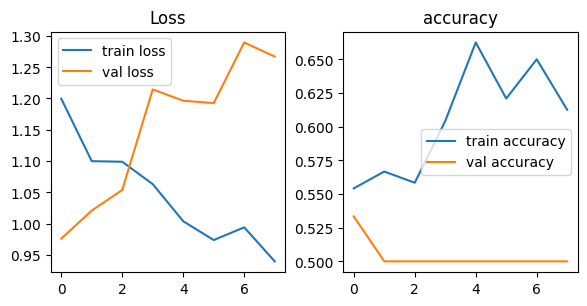

In [24]:
plot_keras_history(convnet_model_history_v3, "accuracy")

In summary, again not a success. Didn't get an improvement on validation accuracy or a reduction in overfitting, despite my best efforts. Although 2d convolutional neural networks resulted in a failure for me as a whole, I will try and carry the learnings forward into transfer learning.

# Transfer Learning

The first version is just a rehash of the lecture code in an attempt at getting an understanding of where the positives/negatives lie.

In [25]:
resnet50_base = ResNet50(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


With only 1 dense layer, the model seems relatively simple in structure, as I assume the resnet does a large proportion of the heavy lifting here.

In [26]:
inputs = Input(shape=(224, 224, 3))
x = resnet.preprocess_input(inputs)
x = resnet50_base(x)
x = Flatten()(x)
x = Dense(units=16, activation="relu")(x)
outputs = Dense(units=1, activation="sigmoid")(x)
transfer_modelv1 = Model(inputs=inputs, outputs=outputs)

Freeze the weights in the layers of the convolutional base.

In [27]:
for layer in resnet50_base.layers:
    layer.trainable = False

In [28]:
transfer_modelv1.compile(optimizer=RMSprop(learning_rate=0.001), loss="binary_crossentropy", metrics=["accuracy"])

In [29]:
transfer_model_history_v1 = transfer_modelv1.fit(train_dataset, epochs=30,
                validation_data=val_dataset,
                callbacks=[EarlyStopping(monitor="val_loss", patience=4, restore_best_weights=True)],
                verbose=1)

Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - accuracy: 0.5134 - loss: 10.8425 - val_accuracy: 0.8611 - val_loss: 0.5123
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 253ms/step - accuracy: 0.8455 - loss: 0.5986 - val_accuracy: 0.8611 - val_loss: 0.4607
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 250ms/step - accuracy: 0.9339 - loss: 0.3710 - val_accuracy: 0.9222 - val_loss: 0.4391
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 288ms/step - accuracy: 0.9262 - loss: 0.3342 - val_accuracy: 0.9333 - val_loss: 0.3395
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 322ms/step - accuracy: 0.9452 - loss: 0.2502 - val_accuracy: 0.9278 - val_loss: 0.3466
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 295ms/step - accuracy: 0.9402 - loss: 0.3141 - val_accuracy: 0.9333 - val_loss: 0.3027
Epoch 7/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 297ms/step - accuracy: 0.9852 - loss: 0.0554 - val_accuracy: 0.9389 - val_loss: 0.4541
Epoch 8/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 271ms/step - accuracy: 0.9463 - loss: 0.2303 - val_accuracy: 0.9111 - val_loss: 

In [30]:
transfer_modelv1.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item (GetItem)  │ (None, 224, 224)  │          0 │ input_layer_6[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_1          │ (None, 224, 224)  │          0 │ input_layer_6[0]… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_2          │ (None, 224, 224)  │          0 │ input_layer_6[0]… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stack (Stack)       │ (None, 224, 224,  │          0 │ get_item[0][0],   │
│                     │ 3)                │            │ get_item_1[0][0], │
│                     │                   │            │ get_item_2[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 224, 224,  │          0 │ stack[0][0]       │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ resnet50            │ (None, 7, 7,      │ 23,587,712 │ add[0][0]         │
│ (Functional)        │ 2048)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_3 (Flatten) │ (None, 100352)    │          0 │ resnet50[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_10 (Dense)    │ (None, 16)        │  1,605,648 │ flatten_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_11 (Dense)    │ (None, 1)         │         17 │ dense_10[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 26,799,044 (102.23 MB)

 Trainable params: 1,605,665 (6.13 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

 Optimizer params: 1,605,667 (6.13 MB)

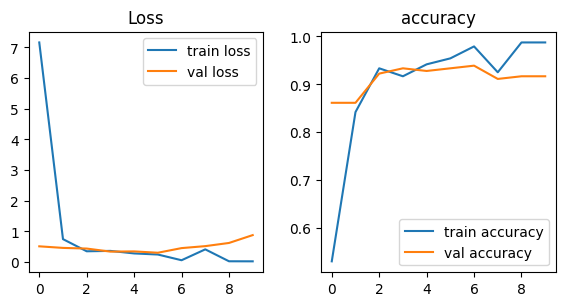

In [31]:
plot_keras_history(transfer_model_history_v1, "accuracy")

The model is showing very positive values, with a ~100% training accuracy but more importantly a ~90% validation accuracy. Again, the worry here would be that it is memorizing rather than generalizing but at least the validation accuracy is solid.

Same thing as above, but now that the top layers are well-trained, the base layers can be unfrozen. The BatchNormalization layers remain frozen though.

In [32]:
for layer in resnet50_base.layers:
    if isinstance(layer, BatchNormalization):
        layer.trainable = False
    else:
        layer.trainable = True

In [33]:
transfer_modelv1.compile(optimizer=RMSprop(learning_rate=0.0001), loss="binary_crossentropy", metrics=["accuracy"])

In [34]:
transfer_model_history_v1 = transfer_modelv1.fit(train_dataset, epochs=30,
                validation_data=val_dataset,
                callbacks=[EarlyStopping(monitor="val_loss", patience=7, restore_best_weights=True)],
                verbose=1)

Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 54s 4s/step - accuracy: 0.7025 - loss: 2.5554 - val_accuracy: 0.8167 - val_loss: 0.5822
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 368ms/step - accuracy: 0.8422 - loss: 0.4878 - val_accuracy: 0.8944 - val_loss: 0.3656
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 435ms/step - accuracy: 0.9198 - loss: 0.2324 - val_accuracy: 0.9111 - val_loss: 0.2556
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 466ms/step - accuracy: 0.9908 - loss: 0.0536 - val_accuracy: 0.9222 - val_loss: 0.2422
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 351ms/step - accuracy: 0.8403 - loss: 0.5096 - val_accuracy: 0.6333 - val_loss: 0.6642
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 357ms/step - accuracy: 0.9040 - loss: 0.2816 - val_accuracy: 0.8556 - val_loss: 0.3454
Epoch 7/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 495ms/step - accuracy: 0.9901 - loss: 0.0389 - val_accuracy: 0.8778 - val_loss: 0.2893
Epoch 8/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 354ms/step - accuracy: 1.0000 - loss: 0.0020 - val_accuracy: 0.8778 - val_loss: 0

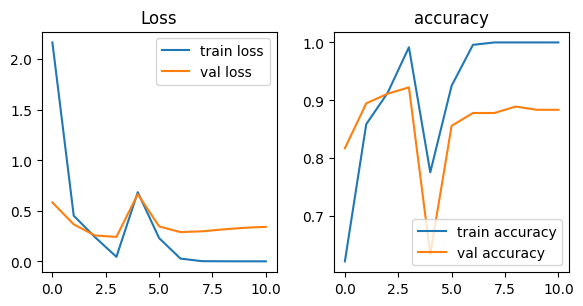

In [35]:
plot_keras_history(transfer_model_history_v1, "accuracy")

Took longer to reach the heights of the initial model but reached them nevertheless. Didn't beat the scores of the initial model though so some tweaks to reduce overfitting might benefit it.

# Transfer Learning Version 2

Implementing transfer model with a few tweaks in an effort to reduce the overfitting. Dropout was added, 'Flatten' was swapped with 'GlobalAveragePooling2D' and weight regularization was included. I decided against data augmentation as I believe the images are fine as they are.

In [36]:
inputs = Input(shape=(224, 224, 3))
x = resnet.preprocess_input(inputs)
x = resnet50_base(x)
x = GlobalAveragePooling2D()(x)
x = Dense(
    units=16,
    activation="relu",
    kernel_regularizer=regularizers.l2(0.001))(x)
x = Dropout(0.5)(x)
outputs = Dense(1, activation="sigmoid")(x)
transfer_modelv2 = Model(inputs=inputs, outputs=outputs)

Using the same freezing/unfreezing weight methods as before.

In [37]:
for layer in resnet50_base.layers:
    layer.trainable = False

In [38]:
transfer_modelv2.compile(optimizer=RMSprop(learning_rate=0.001), loss="binary_crossentropy", metrics=["accuracy"])

In [39]:
transfer_model_history_v2 = transfer_modelv2.fit(train_dataset, epochs=30,
                validation_data=val_dataset,
                callbacks=[EarlyStopping(monitor="val_loss", patience=4, restore_best_weights=True)],
                verbose=1)

Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.5944 - loss: 0.6703 - val_accuracy: 0.8778 - val_loss: 0.4268
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 293ms/step - accuracy: 0.9033 - loss: 0.3611 - val_accuracy: 0.9278 - val_loss: 0.3094
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 266ms/step - accuracy: 0.9223 - loss: 0.2894 - val_accuracy: 0.9222 - val_loss: 0.2726
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 239ms/step - accuracy: 0.9185 - loss: 0.2612 - val_accuracy: 0.9222 - val_loss: 0.2458
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 249ms/step - accuracy: 0.9544 - loss: 0.1801 - val_accuracy: 0.9222 - val_loss: 0.2341
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 273ms/step - accuracy: 0.9573 - loss: 0.2216 - val_accuracy: 0.9333 - val_loss: 0.2198
Epoch 7/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 347ms/step - accuracy: 0.9750 - loss: 0.1710 - val_accuracy: 0.9222 - val_loss: 0.2204
Epoch 8/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 367ms/step - accuracy: 0.9804 - loss: 0.1328 - val_accuracy: 0.9333 - val_loss: 0

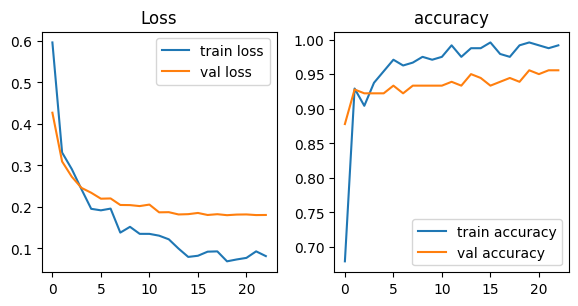

In [40]:
plot_keras_history(transfer_model_history_v2, "accuracy")

Improvement! Validation accuracy is going beyond 90% and it seems like the model is instantly training judging by the constant fluctuations rather than trying to memorize, yet despite that it still maintains a 95%+ training accuracy. I will test it with the base layers unfrozen now too though.

In [58]:
inputs = Input(shape=(224, 224, 3))
x = resnet.preprocess_input(inputs)
x = resnet50_base(x)
x = GlobalAveragePooling2D()(x)
x = Dense(
    units=16,
    activation="relu",
    kernel_regularizer=regularizers.l2(0.001))(x)
x = Dropout(0.5)(x)
outputs = Dense(1, activation="sigmoid")(x)
transfer_modelv3 = Model(inputs=inputs, outputs=outputs)

In [42]:
for layer in resnet50_base.layers:
    if isinstance(layer, BatchNormalization):
        layer.trainable = False
    else:
        layer.trainable = True

In [43]:
transfer_modelv3.compile(optimizer=RMSprop(learning_rate=0.0001), loss="binary_crossentropy", metrics=["accuracy"])

In [44]:
transfer_model_history_v3 = transfer_modelv3.fit(train_dataset, epochs=30,
                validation_data=val_dataset,
                callbacks=[EarlyStopping(monitor="val_loss", patience=7, restore_best_weights=True)],
                verbose=1)

Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.4796 - loss: 0.8247 - val_accuracy: 0.5667 - val_loss: 0.6774
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 342ms/step - accuracy: 0.5304 - loss: 0.7301 - val_accuracy: 0.5667 - val_loss: 0.7023
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 435ms/step - accuracy: 0.6034 - loss: 0.7042 - val_accuracy: 0.8222 - val_loss: 0.6096
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 417ms/step - accuracy: 0.6616 - loss: 0.6380 - val_accuracy: 0.5000 - val_loss: 1.0677
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 377ms/step - accuracy: 0.5937 - loss: 0.8525 - val_accuracy: 0.7389 - val_loss: 0.6037
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 379ms/step - accuracy: 0.7779 - loss: 0.5765 - val_accuracy: 0.7833 - val_loss: 0.5002
Epoch 7/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 356ms/step - accuracy: 0.8242 - loss: 0.4447 - val_accuracy: 0.5000 - val_loss: 1.4948
Epoch 8/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 428ms/step - accuracy: 0.6814 - loss: 0.9259 - val_accuracy: 0.5222 - val_loss: 0

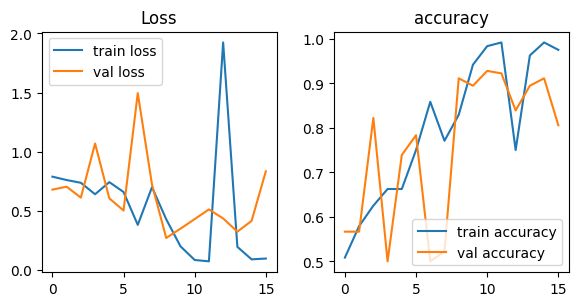

In [45]:
plot_keras_history(transfer_model_history_v3, "accuracy")

Highly fluctuating compared to the version with frozen weights. Still gives really good accuracy scores and low loss values so still a very acceptable model. Between the two however it is evident that the version with the base layer weights frozen is better, and with a ~95% training accuracy and ~92% validation accuracy, I don't believe any more changes to the model are necessary. It is ready for the test dataset.

# Grid Search to Select Hyperparameters

I saw this model in the lecture code while preparing for this assignment. While it was ultimately not used in the end due to its extensive runtime and the high level of performance of the transfer learning model, I still wanted to keep it in here to show I made the necessary changes to it to cater to my project and that I did attempt more different approaches.

In [46]:
# def build_sheep_goat_model(hp):
#     inputs = Input(shape=(224, 224, 3))
#     x = Rescaling(1./255)(inputs)

#     # First conv layer (fixed)
#     x = Conv2D(32, (3, 3), activation="relu", padding="same")(x)
#     x = MaxPooling2D((2, 2))(x)

#     # Optional extra conv layer (replaces your hp.Boolean block)
#     hp_is_multilayered = hp.Boolean("is_multi_layered")
#     if hp_is_multilayered:
#         x = Conv2D(
#             filters=hp.Choice("filters", values=[32, 64]),
#             kernel_size=(3, 3),
#             activation="relu",
#             padding="same"
#         )(x)
#         x = MaxPooling2D((2, 2))(x)

#     x = Flatten()(x)

#     x = Dense(units=hp.Choice("dense_units", [32, 64, 128]), activation="relu")(x)

#     outputs = Dense(1, activation="sigmoid")(x)

#     model = Model(inputs, outputs)

#     model.compile(
#         optimizer=hp.Choice("optimizer", ["sgd", "rmsprop", "adam", "nadam"]),
#         loss="binary_crossentropy",
#         metrics=["accuracy"]
#     )

#     return model

In [47]:
# tuner = keras_tuner.RandomSearch(
#     build_sheep_goat_model,
#     objective="accuracy",
#     max_trials=5,
#     directory = train_dir,
#     project_name="tuner_state",
#     overwrite=True)

In [48]:
# tuner.search(train_dataset, epochs=20, validation_data=val_dataset)

# Testing best model

I have finally decided on the transfer learning model version 2 as my best and it is what I will run the test dataset on. If you unfreeze the base layers and run transfer learning model version 3, the tests results here may be messed up. In that case don't ignore the best network below and do run it in order to get the accuracy you should be getting.

In [49]:
test_loss, test_acc = transfer_modelv2.evaluate(test_dataset)
test_loss, test_acc

6/6 ━━━━━━━━━━━━━━━━━━━━ 34s 6s/step - accuracy: 0.8863 - loss: 0.4862


(0.43645358085632324, 0.8888888955116272)

I am happy with a test accuracy of ~90% and am willing to now move onto the demo with this model.

# Renaming of best network (Ignore if test accuracy above is ~90%)

In [50]:
resnet50_base = ResNet50(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

In [51]:
inputs = Input(shape=(224, 224, 3))
x = resnet.preprocess_input(inputs)
x = resnet50_base(x)
x = GlobalAveragePooling2D()(x)
x = Dense(
    units=16,
    activation="relu",
    kernel_regularizer=regularizers.l2(0.001))(x)
x = Dropout(0.5)(x)
outputs = Dense(1, activation="sigmoid")(x)
best_network = Model(inputs=inputs, outputs=outputs)

In [52]:
for layer in resnet50_base.layers:
    layer.trainable = False

In [53]:
best_network.compile(optimizer=RMSprop(learning_rate=0.001), loss="binary_crossentropy", metrics=["accuracy"])

In [54]:
best_network_history = best_network.fit(train_dataset, epochs=30,
                validation_data=val_dataset,
                callbacks=[EarlyStopping(monitor="val_loss", patience=4, restore_best_weights=True)],
                verbose=1)

Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.5950 - loss: 0.7823 - val_accuracy: 0.8111 - val_loss: 0.4037
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 376ms/step - accuracy: 0.8260 - loss: 0.4485 - val_accuracy: 0.9278 - val_loss: 0.2693
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 249ms/step - accuracy: 0.8993 - loss: 0.2948 - val_accuracy: 0.8889 - val_loss: 0.3217
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 245ms/step - accuracy: 0.9303 - loss: 0.2467 - val_accuracy: 0.9111 - val_loss: 0.2631
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 269ms/step - accuracy: 0.9315 - loss: 0.1952 - val_accuracy: 0.9389 - val_loss: 0.1951
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 265ms/step - accuracy: 0.9361 - loss: 0.1844 - val_accuracy: 0.9500 - val_loss: 0.1881
Epoch 7/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 347ms/step - accuracy: 0.9612 - loss: 0.1595 - val_accuracy: 0.9389 - val_loss: 0.1879
Epoch 8/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 280ms/step - accuracy: 0.9682 - loss: 0.1237 - val_accuracy: 0.9333 - val_loss: 0

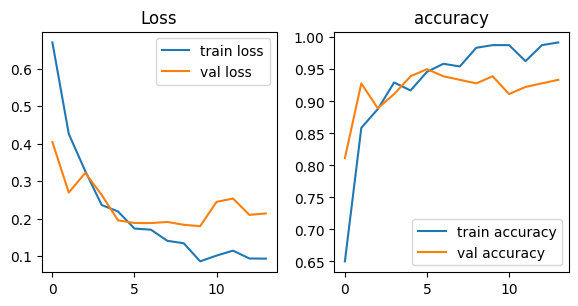

In [55]:
plot_keras_history(best_network_history, "accuracy")

In [56]:
test_loss, test_acc = best_network.evaluate(test_dataset)
test_loss, test_acc

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 148ms/step - accuracy: 0.9279 - loss: 0.1653


(0.16654957830905914, 0.9277777671813965)

In [57]:
best_network.save(os.path.join(base_dir, "best_network.keras"))